In [2]:
import math

import numpy as np
import matplotlib.pyplot as plt

import sampling_alg
import area_mandelbrot as am
import sampling_alg
from collections import Counter

In [3]:
plt.figure()
plt.close('all')
plt.rcParams["font.size"] = 22

In [4]:
re_min, re_max = -2, 0.47,
im_min, im_max = -1.12, 1.12
s = 10 ** 6 # sample size
i = 10**4   # iterations
N = 10
rng = np.random.default_rng(0)

In [5]:
samples = sampling_alg.sample_pr(re_min,re_max,im_min,im_max,rng,s,rng)

# Check if the samples are part of the MB-set
res =am.mandelbrot(samples, i)

In [6]:
all_divergent = res[res<max(res)]

all_divergent.sort()
ct_ad = Counter(all_divergent)

# accuracy of cutting off after 4000
percentile = (len(all_divergent[all_divergent<4000])/len(all_divergent))
# point at which 99.99% diverge
nr_iterations = (all_divergent[int(len(all_divergent)*percentile)])
print(percentile, nr_iterations)

0.9998515672029489 4011


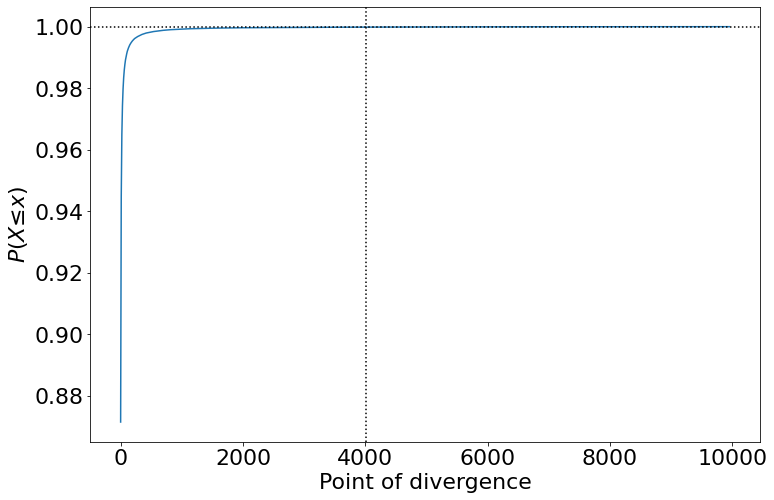

In [7]:
data = all_divergent
count, bins = np.histogram(data,bins=1000)
pdf = count/ sum(count)
cdf = np.cumsum(count)/len(all_divergent)

plt.figure(figsize=(12,8))
plt.plot(bins[:-1], cdf, label="CDF")
plt.axvline(nr_iterations,color='black',linestyle=':')
plt.axhline(percentile,color='black',linestyle=':')
plt.ylabel(fr"$P(X ≤ x)$")
plt.xlabel("Point of divergence")
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'keys'

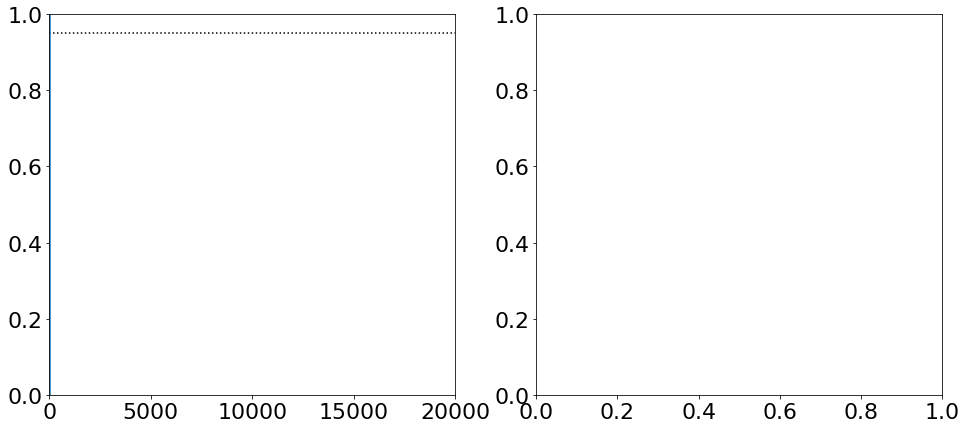

In [8]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,7))
# ax1.hist(Counter(all_divergent), cumulative=True, density=True, color='blue',bins=1000)
ax1.axhline(.95,color='black',linestyle=':')
ax1.axvline(21)
ax1.set_xlim(0,20000)
ax2.bar(data.keys(),data.values())# cumulative=False, density=False, color='blue',bins=10)
# ax2.set_xlim(0,20000)
plt.show()

In [ ]:
import math
pure_random_sample = sampling_alg.sample_pr(re_min, re_max, im_min, im_max,rng,16,rng)
real_pr = pure_random_sample.real
im_pr = pure_random_sample.imag

lh_sample = sampling_alg.sample_lh(re_min, re_max, im_min, im_max,rng, 16,rng)
real_lh = lh_sample.real
im_lh = lh_sample.imag
n_samples = 16
real_grid = np.linspace(re_min, re_max, n_samples + 1)
im_grid = np.linspace(im_min, im_max, n_samples + 1)
rng2 = np.random.default_rng(1)
ot = sampling_alg.sample_ot(re_min,re_max,im_min,im_max,rng, n_samples=16,rng_2=rng2,antithetic=False)


plt.figure(figsize=(8,8))

for i in range(n_samples+1):
    plt.axvline(np.linspace(re_min, re_max, n_samples+1)[i],color='black',linestype)
    plt.axhline(np.linspace(im_min, im_max, n_samples+1)[i],color='black',linestype)

for i in range(math.isqrt(n_samples)+1):
    plt.axhline(np.linspace(im_min, im_max, math.isqrt(n_samples)+1)[i],color='royalblue')
    plt.axvline(np.linspace(re_min, re_max, math.isqrt(n_samples)+1)[i],color='royalblue')
print(math.isqrt(n_samples))
plt.scatter(ot.real,ot.imag,color = 'red')
# plt.scatter(real_pr,im_pr)
# plt.scatter(real_lh,im_lh)
plt.ylabel("Imaginary")
plt.xlabel("Real")
plt.show()


In [ ]:
n_samples = 10
real_grid = np.linspace(re_min, re_max, n_samples + 1)
im_grid = np.linspace(im_min, im_max, n_samples + 1)
real_grid

In [9]:
n_subspaces = 4

coordinates_1d = np.arange(n_subspaces**2)
# randomly arrange subspaces
print(coordinates_1d)
rng.shuffle(coordinates_1d.reshape([n_subspaces, n_subspaces]))
# DO SOMETHING
print(coordinates_1d)

rng.shuffle(coordinates_1d.reshape([n_subspaces, n_subspaces]))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[ 8  9 10 11  4  5  6  7  0  1  2  3 12 13 14 15]


In [10]:
coordinates_2d = coordinates_1d.reshape([n_subspaces, n_subspaces])
coordinates_2d.T.reshape(-1)

array([12,  8,  4,  0, 13,  9,  5,  1, 14, 10,  6,  2, 15, 11,  7,  3])

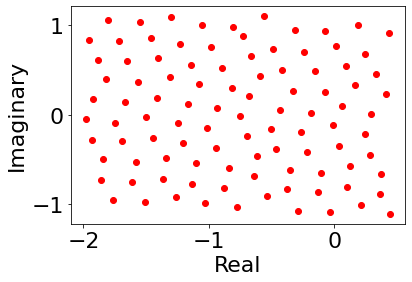

In [11]:
rng1 = np.random.default_rng(0)
rng2 = np.random.default_rng(1)
new = sampling_alg.sample_ot(re_min,re_max,im_min,im_max,rng, n_samples=100,rng_2=rng2)
plt.scatter(new.real,new.imag,color = 'red')
# plt.scatter(nat.real, nat.imag,color='green')
# plt.scatter(real_pr,im_pr,color='blue')
# plt.scatter(real_lh,im_lh,color='green')
plt.ylabel("Imaginary")
plt.xlabel("Real")
plt.show()


In [12]:
mine = new.real
np.split(new.real,2)

[array([ 0.24344425, -0.26089278, -0.50442504, -1.01131929, -0.00538823,
        -1.24570786, -1.74485563, -1.98052581, -1.49851109, -0.7537986 ,
         0.25101083, -0.23634311, -0.48827466, -0.98082086,  0.01923401,
        -1.2273739 , -1.71631578, -1.95107579, -1.45754707, -0.72239769,
         0.2857683 , -0.21476079, -0.4646319 , -0.93864284,  0.03814689,
        -1.20673812, -1.6881998 , -1.93141593, -1.44145882, -0.69294275,
         0.29807794, -0.18384385, -0.4325544 , -0.93635997,  0.06594081,
        -1.16383997, -1.66425436, -1.91947559, -1.41115493, -0.67831545,
         0.33441896, -0.15360015, -0.41554633, -0.89295522,  0.09167719,
        -1.14075871, -1.64946708, -1.88138161, -1.4024743 , -0.66418565]),
 array([ 0.36762411, -0.1262263 , -0.37284953, -0.87684383,  0.106269  ,
        -1.13532483, -1.61355069, -1.85871824, -1.36186144, -0.63453762,
         0.37651589, -0.10700851, -0.34991515, -0.83999733,  0.12791796,
        -1.09888935, -1.58270052, -1.84135889, -1

# Comparison Plot/Table (Bar?)

In [1]:
# fix iterations
# fix sample size
# plot variance
# could be table
from area import mc_area
import sampling_alg as sa
import area_mandelbrot as am
import numpy as np

In [10]:
re_min, re_max = -2, 0.47,
im_min, im_max = -1.12, 1.12
s = 10 ** 6 # sample size
i = 10**4   # iterations
N = 10
rng = np.random.default_rng(0)
rng2 = np.random.default_rng(1)

samples = np.array([10_000])
print(samples)
bounds = -2, 0.47, -1.12, 1.12
iterations = np.array([4000])  # iterations

pr_points = sa.sample_pr(re_min,re_max,im_min,im_max,rng, n_samples=100,rng2=rng2)

# run simulation normal
area_1 = am.area(sa.sample_pr, bounds, 100, i,antithetic=False)


# invert points
# pr_inv = sampling_alg.convert_antithetic(pr_points)
# run simulation inverted
area_2 = am.area(sa.sample_pr, bounds, 100, i,antithetic=True)
# take average area
area_true = (area_1 + area_2)/2
print(area_1)
print(area_2)
print(area_true)

# sample_pr(re_min, re_max, im_min, im_max, rng, n_samples, rng2, antithetic=False):


[10000]
1.5491840000000001
1.65984
1.6045120000000002
